In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

(127, 10)
(127, 10)
     Age        BMI  Glucose    Insulin      HOMA     Leptin  Adiponectin  \
0     52  26.543128       83   6.156439  1.352861  22.531863     8.832323   
1     41  23.527236       74   4.835092  1.013678  15.552154     6.289545   
2     40  23.278413       73   4.726075  0.985695  14.976300     6.079755   
3     27  19.535749       63   3.086309  0.564775   6.314613     2.924216   
4     32  20.839655       66   3.657587  0.711419   9.332254     4.023573   
..   ...        ...      ...        ...       ...        ...          ...   
122   45  26.850000       92   3.330000  0.755688  54.680000    12.100000   
123   62  26.840000      100   4.530000  1.117400  12.450000    21.420000   
124   65  32.050000       97   5.730000  1.370998  61.480000    22.540000   
125   72  25.590000       82   2.820000  0.570392  24.960000    33.750000   
126   86  27.180000      138  19.910000  6.777364  90.280000    14.110000   

      Resistin       MCP.1     Status  
0    10.084147 

Text(0, 0.5, 'Density')

<Figure size 432x288 with 0 Axes>

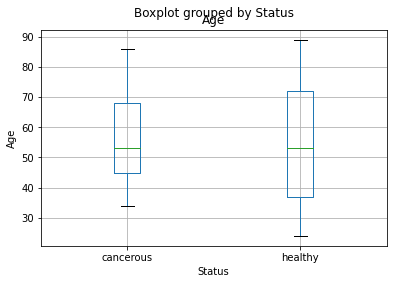

<Figure size 432x288 with 0 Axes>

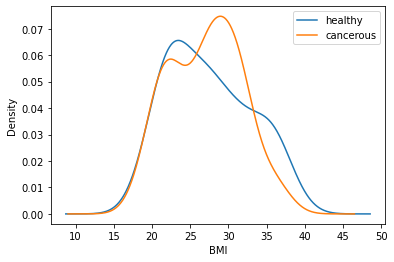

In [2]:
#Task 1 - Data Loading
filename = 'clinical_dataset.xlsx'
dataframe = pd.read_excel(filename,header=0)
print(dataframe.shape)

dataframe.dropna()
# There are no missing values, as evidenced by the consistent size
print(dataframe.shape)
# There are ten features
print(dataframe)
dataframe['Status']=dataframe['Status'].astype('str')
# 1 categorical variable: Status, as it has a finite number of categories (2: either healthy or cancerous) and no intrinsic order
print("Summary Statistics")
sumstat=dataframe.describe()
print(sumstat)
sumstat.to_excel('SummaryStatistics.xlsx')


# Normalising: setting all inputs to be in the same range

# Box Plot of Age and Status
plt.figure()
boxPlot = dataframe.boxplot(column='Age',by='Status')
boxPlot.set_xlabel("Status")
boxPlot.set_ylabel("Age")

#Density Plot of BMI and Status
plt.figure()
dataInp = pd.DataFrame({'healthy':dataframe['BMI'].loc[dataframe['Status']=='healthy'],
                    'cancerous':dataframe['BMI'].loc[dataframe['Status']=='cancerous']})

densPlot=dataInp.plot.kde()
densPlot.set_xlabel("BMI")
densPlot.set_ylabel("Density")


In [3]:
from sklearn.model_selection import train_test_split
data = dataframe.to_numpy()
np.random.shuffle(data)
y = data[:,9]
x = data[:,0:9]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1)
print(np.shape(train_x))
print(np.shape(test_x))

(114, 9)
(13, 9)


C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


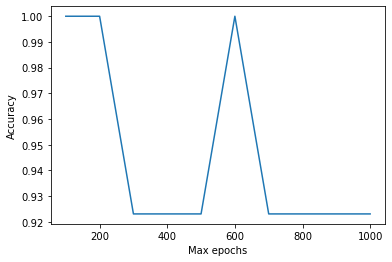

In [11]:
# Neural Network

from sklearn.neural_network import MLPClassifier

neuron = 500
#iterate = np.array([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
iterate = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
activfun = 'logistic'
np.set_printoptions(precision=20)
result=np.zeros(len(iterate))
#Set up artificial neural network using sklearn MLPClassifier
point = 0
for i in iterate:
    net = MLPClassifier(hidden_layer_sizes=[neuron,neuron], # Array of 2, for 2 hidden layers
                    activation=activfun, # Set the activation function for the classifier
                    max_iter=i, # Set the cut off point, after which no more iterations are made
                    n_iter_no_change=10 # Save data by not iterating more than required
                   )
    
    net.fit(train_x, train_y)
    scoreNet = net.score(test_x, test_y)
    result[point] = scoreNet
    point=point+1

plt.figure()
plt.plot(iterate,result)
plt.ylabel('Accuracy')
plt.xlabel('Max epochs')
plt.show()

In [12]:
# Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
np.set_printoptions(precision=5)
n_trees = np.array([10, 50, 100, 1000, 5000, 10000])
ns_leaf = np.array([5, 50])
result = np.zeros((6,2))
a = 0
for i in n_trees:
    b = 0
    for j in ns_leaf:
        tree = RandomForestClassifier(n_estimators=i,
                              min_samples_leaf=j)
        tree.fit(train_x, train_y)
        
        scoreTree = tree.score(test_x, test_y)
        print(scoreTree)
        result[a,b]=scoreTree
        b=b+1
    a=a+1
resultDF=pd.DataFrame(data=result,
                   index=n_trees,
                   columns=ns_leaf)
resultDF.to_excel('results.xlsx')


0.9230769230769231
0.38461538461538464
0.8461538461538461
0.38461538461538464
0.9230769230769231
0.38461538461538464
0.9230769230769231
0.38461538461538464
0.9230769230769231
0.38461538461538464
0.9230769230769231
0.38461538461538464


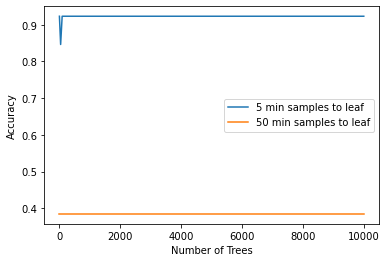

In [13]:
plt.figure()
plt.plot(n_trees,result)
plt.legend(('5 min samples to leaf','50 min samples to leaf'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Trees')
plt.show()

In [86]:
def neuralNet(xTrain,xTest,yTrain,yTest,neurons,net):
    a = 0;
    output = np.zeros(3)
    for i in neurons:
        net.hidden_layer_sizes=[i,i]
        net.fit(xTrain,yTrain)
        output[a]=net.score(xTest,yTest)
        a=a+1
    return output
def classTree(xTrain,xTest,yTrain,yTest,trees,tree):
    a = 0;
    output = np.zeros(3)
    for i in trees:
        tree.n_estimators = i
        tree.fit(xTrain,yTrain)
        output[a]=tree.score(xTest,yTest)
        a=a+1
    return output

In [94]:
#KFold Testing
from sklearn.model_selection import KFold
#Splitting the data into 10 folds
nf = KFold(n_splits=10, shuffle=True)

split=nf.split(data)


a = 1
#trees=[10, 20, 30] # Test cases, for quick testing
#neurons=[10, 20, 30]
trees=[20, 500, 10000] # Actual cases
neurons=[50, 500, 1000]
net.max_iter = 600
tree.min_samples_leaf=5
nnres = np.zeros((10,3))
ctres = np.zeros((10,3))
i = 0
for train, test in split:
    xTrain = x[train]; xTest=x[test]
    yTrain = y[train]; yTest=y[test]
    nnres[i,:]=neuralNet(xTrain,xTest,yTrain,yTest,neurons,net)
    ctres[i,:]=classTree(xTrain,xTest,yTrain,yTest,trees,tree)
    i=i+1
    
# Averages of k-fold testing
netResult=np.zeros(1,3)
treeResult = np.zeros(1,3)
for i in range(3):
    placeholder=nnres[:,i].sum()
    netResult[0,i]=placeholder/10
    placeholder=ctres[:,i].sum()
    treeResult[0,i]=placeholder/10
print("Complete!")

C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Complete!


In [95]:
print("Neural Network raw results: \n", nnres)
print("Classification tree raw results: \n", ctres)

print("-------------------------------")
print("Neural Network average results: ", netResult)
print("Classification tree average results: ", treeResult)

Neural Network raw results: 
 [[0.92308 0.92308 0.69231]
 [0.69231 0.76923 0.76923]
 [0.69231 0.84615 0.84615]
 [0.69231 0.76923 0.69231]
 [0.84615 0.84615 0.76923]
 [0.61538 0.69231 0.61538]
 [1.      0.69231 0.69231]
 [0.75    0.83333 0.41667]
 [0.83333 1.      0.33333]
 [0.33333 0.66667 0.66667]]
Classification tree raw results: 
 [[0.92308 0.92308 0.92308]
 [0.61538 0.61538 0.61538]
 [1.      0.92308 0.92308]
 [0.53846 0.69231 0.69231]
 [0.76923 0.53846 0.53846]
 [0.69231 0.76923 0.76923]
 [0.76923 0.84615 0.76923]
 [0.75    0.75    0.75   ]
 [0.83333 0.83333 0.91667]
 [0.91667 0.83333 0.83333]]
-------------------------------
Neural Network average results:  [0.73782 0.80385 0.64936]
Classification tree average results:  [0.78077 0.77244 0.77308]


In [110]:
## Save data as excel spreadsheet
outnn = np.append(nnres,netResult,0)
outct = np.append(ctres,treeResult,0)
column = np.array([1,2,3,4,5,6,7,8,9,10,'Average'])
netfile=pd.DataFrame(data=outnn,
                    index=column,
                    columns=neurons)
treefile=pd.DataFrame(data=outct,
                    index=column,
                    columns=trees)
with pd.ExcelWriter('Training Results.xlsx') as sheet:
    netfile.to_excel(sheet, sheet_name='Artificial Neural Network')
    treefile.to_excel(sheet, sheet_name='Classification Tree')